![logo](../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# Reanalysis comparison with observations for agriculture and hydrology applications 

Production date: 04-2025

Produced by: CNR-ISMAR

## 🌍 Use case: Investigating the extremes of soil moisture deficit in Europe in support of agriculture

## ❓ Quality assessment question
* **How accurate are drought indicators derived from modern global reanalysis?**

By comparing model outputs with independent observational datasets, discrepancies between modelled and observed values can be identified and quantified. In this assessment, we assess the accuracy of detecting the 2022 European drought conditions using the Soil Moisture Anomaly indicator. This indicator is derived from ERA5 and ERA5-Land, the most recent atmospheric and land reanalyses produced by the European Centre for Medium-Range Weather Forecasts (ECMWF), and is compared with the same indicator computed from satellite observations provided by the European Space Agency's Climate Change Initiative (ESA CCI). Relevant literature is also referenced to support the analysis.

By design, reanalysis datasets are free from missing data. One of the main advantages of using reanalyses is their provision of consistent, long-term global coverage, whereas observational datasets are often sparse or discontinuous in both space and time, particularly over extended periods. This is a crucial consideration when working with satellite-based datasets. Such data may be affected by retrieval failures or temporal discontinuities associated with instrument changes. In particular, remotely sensed soil moisture estimates can become unreliable under certain conditions, such as when the ground is frozen or obscured by dense vegetation. Additionally, quality flags are provided for barren land surfaces; while data are available for these areas, their inclusion depends on the specific requirements of the intended application.

## 📢 Quality assessment statements

```{admonition} These are the key outcomes of this assessment
:class: note
* The comparison between reanalysis data (ERA5 and ERA5-Land) and satellite observations (ESA CCI COMBINED) allows for the quantification of discrepancies in the representation of drought conditions, such as the 2022 European event;

* In 2022, reanalyses and ESA CCI exhibit overall consistency in terms of drought magnitude and severity, although the former tend to slightly overestimate the affected area;

* ERA5 is well-suited for deriving meteorological drought indices (e.g., Standardised Precipitation Index (SPI), Standardised Precipitation and Evapotranspiration Index (SPEI)) due to its accuracy in atmospheric variables;

* For applications requiring higher spatial resolution and improved soil representation (e.g., agriculture), ERA5-Land is preferable to ERA5;

* ESA CCI COMBINED remains the most reliable satellite-derived soil moisture dataset currently available, but it should be used with caution for periods prior to 2000.
```

## 📋 Methodology

The ESA CCI Soil Moisture COMBINED dataset integrates observations from both active and passive microwave sensors to provide consistent global estimates of surface soil moisture. Prior to July 1991, the dataset relies exclusively on passive sensors, resulting in more limited spatial and temporal coverage and greater uncertainty, particularly in regions affected by persistent cloud cover or dense vegetation. From 1991 onwards, the inclusion of active sensors has enhanced both spatio-temporal coverage and the reliability of the observations by combining data from different sensor types. Since 2000, the availability of multiple concurrent active and passive sensors has further improved data quality and completeness [[1]](https://cds.climate.copernicus.eu/datasets/satellite-soil-moisture?tab=documentation). Nevertheless, despite improved consistency in recent product versions, residual sources of uncertainty persist due to the multiple merging steps in the ESA CCI processing chain, changes in the composition of the sensor constellation across product versions, and intrinsic differences between the active and passive input products that are propagated into the COMBINED dataset [[2]](https://doi.org/10.5281/zenodo.8320930).

Here we focus on the period 2000-2022 and the European domain bounded by 30°N–58°N latitude and 10°W–36°E longitude. Surface soil moisture data from both the ESA CCI COMBINED dataset and the reanalyses are retrieved in volumetric moisture content units (i.e. m$^3$ m$^{-3}$). According to the World Meteorological Organization (WMO), 2016 [[3]](https://unfccc.int/sites/default/files/gcos_ip_10oct2016.pdf), the surface layer is generally defined as the top 0–5 cm of soil. For satellite products, this corresponds to an approximate depth of 2–5 cm, whereas reanalysis products typically represent the 0–7 cm soil layer.

The primary aim of this analysis is to evaluate the performance of the different datasets in capturing drought-related extreme events across Europe. This question is of growing relevance in the context of climate change and ongoing global warming (IPCC AR6 [[4]](https://www.ipcc.ch/assessment-report/ar6/)). Following the WMO Guide [[5]](https://community.wmo.int/en/guide-instruments-and-methods-observation-wmo-no-8), extreme weather and climate events can be described using the following quantitative components:

* an index quantifying the anomaly from baseline or normal conditions (based on observations),
* threshold(s) used to categorise the event (e.g. moderate or severe drought),
* temporal information (including start date, end date, and duration),
* spatial information (geographical extent of the affected area).

In this assessment, the selected index is the Soil Moisture Anomaly (SMA), computed from both reanalyses and satellite-derived soil moisture. SMA is a standardised anomaly metric, designed to minimise discrepancies arising from differing assumptions in land surface models — such as soil layer depths — and from variations in underlying soil property datasets. This standardisation enables the production of comparable temporal anomalies across datasets (see e.g. [[6]](https://doi.org/10.5194/hess-17-1765-2013)):

$$
SMA_{y,d} = \frac{SM_{y,d} - \mu_{d}}{\sigma_{d}}
$$

Where $SM_{y,d}$ denotes soil moisture at any year $y$ and day $d$, while $\mu_{d}$ and $\sigma_{d}$ denote the respective climatological mean and interannual standard deviation of soil moisture of day $d$ calculated over the reference period. 
A threshold value of −1.5 is adopted, whereby any SMA falling below this value is classified as an abnormal dryness condition. This threshold is informed by the classification scheme used in the Standardised Precipitation Index (SPI), in which values below −1.5 typically indicate severe to extreme drought conditions [[7]](https://drought.emergency.copernicus.eu/data/factsheets/factsheet_soilmoisture.pdf) [[8]](https://climate.colostate.edu/pdfs/relationshipofdroughtfrequency.pdf). 

Results are shown for:

**[](reanalysis_reanalysis-era5-single-levels_extremes-detection_q01:reanalysis-era5-single-levels_validation+extremes_q01:section-1)**
 * Timeseries

**[](reanalysis_reanalysis-era5-single-levels_extremes-detection_q01:reanalysis-era5-single-levels_validation+extremes_q01:section-2)**
 * Magnitude
 * Severity
 * Discussion

## 📈 Analysis and results

Pre-processing of the data is required to enable a meaningful comparison between datasets. Firstly, the surface soil moisture values provided by the reanalysis must be averaged to a daily temporal resolution, as they are originally available at hourly intervals. Furthermore, since the calculation of climatology and standard deviation is required, linear interpolation over time, combined with the application of a rolling mean, can be employed to fill data gaps and reduce high-frequency variability in the daily time series [[9]](https://etrp.wmo.int/pluginfile.php/17441/mod_resource/content/0/49_I-2015-2017_en.pdf). To compute biases between datasets, a first-order conservative remapping approach is used to regrid all products to a common spatial resolution of 0.25° × 0.25°.
Please note that in the **Set parameters** box, there is the variable "use_era5_land", which allows you to switch between ERA5-Land and ERA5.

**Import libraries**

In [11]:
import math
import tempfile

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot
from cartopy.mpl.gridliner import Gridliner

plt.style.use("seaborn-v0_8-notebook")

**Set parameters**

In [12]:
# Time
start = "2000-01"
stop = "2022-12"
index_slice = slice("2022-06-01", "2022-09-30")

# Max value allowed
threshold = -1.5

# Space
area = [58, -10, 36, 30]

# Use ERA5 land
use_era5_land = True

**Define requests**

In [13]:
requests = {}
if use_era5_land:
    requests["ERA5-Land"] = (
        "derived-era5-land-daily-statistics",
        {
            "variable": ["volumetric_soil_water_layer_1"],
            "daily_statistic": "daily_mean",
            "time_zone": "utc+00:00",
            "frequency": "1_hourly",
            "area": area,
        },
    )
    target_grid_request = (
        "reanalysis-era5-land",
        {
            "variable": ["land_sea_mask"],
            "year": ["1940"],
            "month": ["01"],
            "day": ["01"],
            "time": ["00:00"],
            "data_format": "grib",
            "download_format": "unarchived",
            "area": area,
        },
    )
else:
    requests["ERA5"] = (
        "derived-era5-single-levels-daily-statistics",
        {
            "product_type": "reanalysis",
            "variable": ["volumetric_soil_water_layer_1", "land_sea_mask"],
            "daily_statistic": "daily_mean",
            "time_zone": "utc+00:00",
            "frequency": "1_hourly",
            "area": area,
        },
    )
    target_grid_request = (
        "reanalysis-era5-single-levels",
        {
            "product_type": ["reanalysis"],
            "variable": ["land_sea_mask"],
            "year": ["1940"],
            "month": ["01"],
            "day": ["01"],
            "time": ["00:00"],
            "data_format": "grib",
            "download_format": "unarchived",
            "area": area,
        },
    )
requests["ESA CCI COM"] = (
    "satellite-soil-moisture",
    {
        "variable": ["volumetric_surface_soil_moisture"],
        "type_of_sensor": ["combined_passive_and_active"],
        "time_aggregation": ["day_average"],
        "type_of_record": ["cdr"],
        "version": ["v202312"],
    },
)

**Define functions to cache**

In [14]:
def smooth(obj, window):
    obj = obj.chunk(time=-1)
    return obj.interpolate_na("time").rolling(time=window, min_periods=1).mean()

def convert_longitude(obj):
    if obj["longitude"].max() > 180:
        with xr.set_options(keep_attrs=True):
            obj["longitude"] = ((obj["longitude"] + 180) % 360) - 180
        obj = obj.sortby("longitude")
    return obj

def _compute_anomaly_drought_index(
    ds, threshold, target_grid_request, tmpzarr, **xesmf_kwargs
):
    ds = convert_longitude(ds)

    # Get raw data
    (var_name,) = set(ds.data_vars) & {"sm", "swvl1"}
    raw_data = ds[var_name]

    # Mask
    if (lsm := ds.get("lsm")) is not None:
        raw_data = raw_data.where((lsm > 0.7).all("time"))

    # Interpolate
    if target_grid_request:
        grid_out = download.download_and_transform(
            *target_grid_request, invalidate_cache=False
        )
        grid_out = grid_out[["latitude", "longitude"]]
        grid_out = grid_out.drop_vars(set(grid_out.variables) - set(grid_out.dims))
        grid_out = convert_longitude(grid_out)
        raw_data = diagnostics.regrid(raw_data, grid_out, **xesmf_kwargs)
    else:
        assert not xesmf_kwargs

    # Checkpoint
    ds = raw_data.to_dataset(name=var_name)
    ds = ds.chunk({dim: -1 if dim == "time" else "auto" for dim in ds.dims})
    ds.to_zarr(tmpzarr)
    ds = xr.open_dataset(tmpzarr, chunks={}, engine="zarr")
    raw_data = ds[var_name]
    
    # Get time-varying index
    group_dim = "time.dayofyear"
    smooth_data_grouped = smooth(raw_data, 11).groupby(group_dim)
    sma = raw_data.groupby(group_dim) - smooth_data_grouped.mean()
    sma = sma.groupby(group_dim) / smooth_data_grouped.std()
    sma = smooth(sma, 3)
    sma = sma.where(sma < threshold)
    sma.attrs = {"long_name": "Anomaly drought index", "units": "1"}
    return sma.rename("sma")

def compute_anomaly_drought_index(ds, threshold, target_grid_request, **xesmf_kwargs):
    with tempfile.TemporaryDirectory(suffix=".zarr") as tmpzarr:
        da = _compute_anomaly_drought_index(
            ds, threshold, target_grid_request, tmpzarr, **xesmf_kwargs
        )
        da = da.compute()
    return da

def compute_severity(sma):
    severity = sma.sum("time")
    severity = severity.where(severity)
    severity.attrs = {"long_name": "Severity", "units": "1"}
    return severity.rename("severity")

def compute_area(sma):
    coords = ["latitude", "longitude"]
    resolutions = []
    for coord in coords:
        diff = sma[coord].diff(coord).astype("float32").values
        (resolution,) = set(diff)
        resolutions.append(resolution * 111)
    weights = np.abs(np.cos(np.deg2rad(sma["latitude"])))
    area = float(abs(math.prod(resolutions))) * weights
    area = area.where(sma.notnull()).sum(coords)
    area.attrs = {"long_name": "Area", "units": "km2"}
    return area.rename("area")


def compute_mean_and_area(ds, threshold, target_grid_request, **xesmf_kwargs):
    sma = compute_anomaly_drought_index(
        ds, threshold=threshold, target_grid_request=target_grid_request, **xesmf_kwargs
    )
    mean = diagnostics.spatial_weighted_mean(sma)
    area = compute_area(sma)
    return xr.merge([mean, area])


def compute_maps(ds, threshold, index_slice, target_grid_request, **xesmf_kwargs):
    sma = compute_anomaly_drought_index(
        ds, threshold, target_grid_request, **xesmf_kwargs
    )
    sma = sma.sel(time=index_slice)
    severity = compute_severity(sma)
    ds = xr.merge([sma.min("time", keep_attrs=True), severity])
    for coord in ("latitude", "longitude"):
        ds[coord] = ds[coord].astype("float32")
    return ds

**Download and transform**

In [15]:
datasets_maps = []
datasets_timeseries = []
for product, (collection_id, request) in requests.items():
    print(f"{product = }")
    request = download.update_request_date(request, start, stop, stringify_dates=True)
    kwargs = {"threshold": threshold, "target_grid_request": None}
    if collection_id == "satellite-soil-moisture":
        kwargs["target_grid_request"] = target_grid_request
        kwargs["method"] = "conservative"

    # Map
    ds = download.download_and_transform(
        collection_id,
        request,
        chunks={"year": 1, "month": 1},
        transform_func=compute_maps,
        transform_func_kwargs=kwargs | {"index_slice": index_slice},
        transform_chunks=False,
    )
    datasets_maps.append(ds.expand_dims(product=[product]))

    # Timeseries
    ds = download.download_and_transform(
        collection_id,
        request,
        chunks={"year": 1, "month": 1},
        transform_func=compute_mean_and_area,
        transform_func_kwargs=kwargs,
        transform_chunks=False,
    )
    datasets_timeseries.append(ds.expand_dims(product=[product]))

ds_maps = xr.concat(datasets_maps, "product", join="inner").compute()
ds_timeseries = xr.concat(datasets_timeseries, "product", join="inner").compute()

product = 'ERA5-Land'
product = 'ESA CCI COM'


(reanalysis_reanalysis-era5-single-levels_extremes-detection_q01:reanalysis-era5-single-levels_validation+extremes_q01:section-1)=
### 1. Detecting drier-than-normal conditions

#### Timeseries

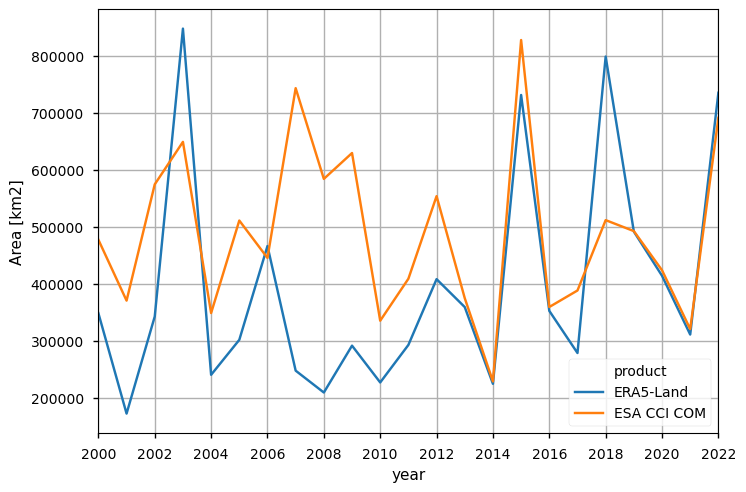

In [16]:
ds_timeseries_summer = (
    ds_timeseries.where(ds_timeseries["time"].dt.month.isin([6, 7, 8, 9]), drop=True)
    .groupby("time.year")
    .mean(keep_attrs=True)
)
if "area" in ds_timeseries_summer:
    ds_timeseries_summer["area"].plot(hue="product")
    plt.grid()
    plt.xlim(2000, 2022)
    plt.xticks(np.arange(2000, 2023, 2))
    plt.show()

*Spatial extent of standardised surface soil moisture anomalies below −1.5, expressed in square kilometres (km²), for the years 2000 to 2022 across the European domain bounded by 30°N–58°N latitude and 10°W–36°E longitude.*

The time series illustrates, for each year, the total area (in km²) affected by anomalously dry conditions. Years characterised by the largest spatial extent — such as 2003, 2015, and 2022 — can be clearly identified. These events are well-documented in the scientific literature [[10]](https://doi.org/10.1038/nature03972) [[11]](https://doi.org/10.1175/BAMS-D-16-0140.1) [[12]](https://doi.org/10.1088/1748-9326/acbc37). Differences between the two type of datasets are also apparent, particularly prior to 2010.
Several factors may explain these discrepancies. Satellite data coverage and quality have improved considerably over time [[13]](https://doi.org/10.1016/j.rse.2014.07.023) [[2]](https://doi.org/10.5281/zenodo.8320930), and it should be also noted that ERA5 assimilates only a subset of the observations provided by ESA/EUMETSAT active sensors. ERA5-Land is not a separate reanalysis, but rather a downscaling of ERA5 using the land surface model HTESSEL at higher spatial resolution (≈9 km vs 31 km). It is forced by meteorological fields from ERA5 (precipitation, radiation, etc.) and does not assimilate additional observations, including soil moisture [[14]](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation).
Section 2 presents results for the June-September 2022 drought in western–central Europe as a case study, with reference to the outcomes reported in Hirschi et al. (2025) [[15]](https://doi.org/10.5194/hess-29-397-2025). 

(reanalysis_reanalysis-era5-single-levels_extremes-detection_q01:reanalysis-era5-single-levels_validation+extremes_q01:section-2)=
### 2. Computing metrics and comparing datasets

Various metrics may be employed to characterise the drought event. Here, we focus on magnitude and severity, which are respectively defined as the minimum standardised anomaly over time, and the time-accumulated standardised anomalies on days (both consecutive and non-consecutive) when the anomaly falls below the defined threshold. These metrics are computed at the grid-point scale.

As previously discussed, satellite data alone are not sufficient to validate the reanalysis. Therefore, in the following analysis, we limit ourselves to examining the relative behaviour of the datasets, which will be further discussed in the final section.

#### Magnitude

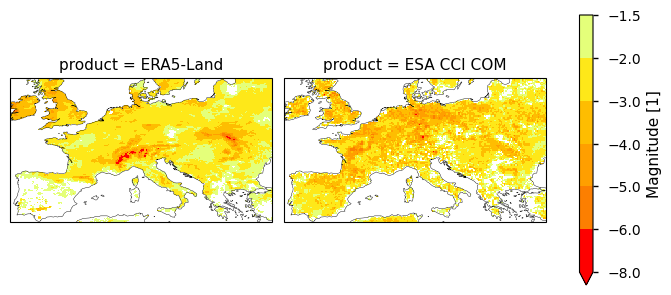

In [17]:
def edit_gridliners(ax):
    gridliners = [artist for artist in ax.axes.artists if isinstance(artist, Gridliner)]
    for gl in gridliners:
        gl.xlines = False
        gl.ylines = False
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        gl.bottom_labels = False
        
variable = "sma"
da = ds_maps[variable]
colors = ["#fe0000", "#fc7f01", "#ff9f00", "#febd01", "#fee819", "#e4ff7a"]
levels = [-8.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.5]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(levels, cmap.N)
facet = plot.projected_map(da, levels=levels, cmap=cmap, norm=norm, col="product")
facet.cbar.set_label("Magnitude [1]")
for ax in facet.axs.flatten():    
    edit_gridliners(ax)  
plt.show()

*Magnitude of the 2022 European drought event (expressed in units of standard deviation) based on the temporal minimum of the standardised
soil moisture anomalies in the surface layers. White areas feature values larger than -1.5.*

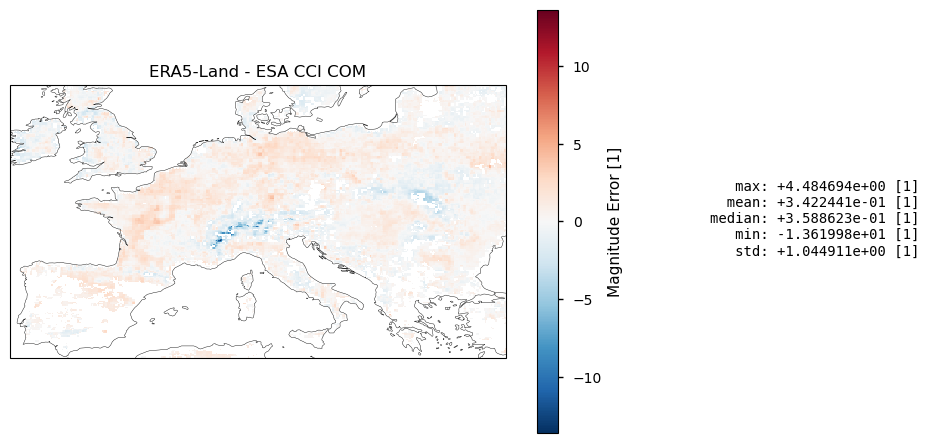

In [18]:
with xr.set_options(keep_attrs=True):
    bias = da.sel(product=list(requests)[0]) - da.sel(product=list(requests)[1])
bias.attrs["long_name"] = "Bias of " + bias.long_name
ax = plot.projected_map(bias)
cbar = plt.gcf().axes[-1] 
cbar.set_ylabel("Magnitude Error [1]") 
edit_gridliners(ax)
plt.title(" - ".join(list(requests)))
plt.show()

*Bias in the reanalysis magnitude of the 2022 European drought event (expressed in units of standard deviation) relative to the ESA CCI COMBINED product in the surface soil layers. Positive values mean an underestimation by the reanalysis.*

#### Severity

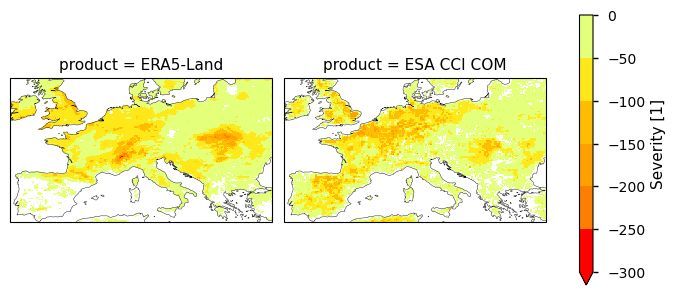

In [19]:
variable = "severity"
da = ds_maps[variable]

colors = ["#fe0000", "#fc7f01", "#ff9f00", "#febd01", "#fee819", "#e4ff7a"]
levels = [-300, -250, -200, -150, -100, -50, 0]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(levels, cmap.N)
facet = plot.projected_map(da, levels=levels, cmap=cmap, norm=norm, col="product")
facet.cbar.set_label("Severity [1]")
for ax in facet.axs.flatten():
    edit_gridliners(ax)
plt.show()

*Severity of the 2022 European drought event (expressed in units of standard deviation) based on the time-accumulated soil moisture anomalies
in the surface layers. White areas feature values larger than -1.5.*

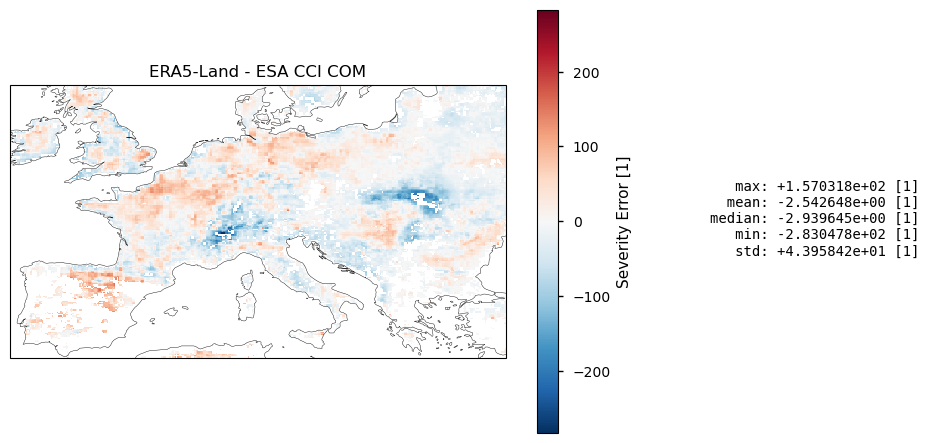

In [20]:
with xr.set_options(keep_attrs=True):
    bias = da.sel(product=list(requests)[0]) - da.sel(product=list(requests)[1])
bias.attrs["long_name"] = "Bias of " + da.long_name
ax = plot.projected_map(bias)
cbar = plt.gcf().axes[-1] 
cbar.set_ylabel("Severity Error [1]") 
edit_gridliners(ax)
plt.title(" - ".join(list(requests)))
plt.show()

*Bias in the reanalysis severity of the 2022 European drought event (expressed in units of standard deviation) relative to the ESA CCI COMBINED product in the surface soil layers. Positive values mean an underestimation by reanalysis.*

#### Discussion

The magnitude of the drought event occurring between 1 June and 30 September 2022 in Europe, as estimated from reanalyses data, is comparable to that derived from satellite observations. The spatial extent of the areas showing values lower than -2 is substantially consistent between the two datasets, in line with the spatial extent time series showing very close affected areas for 2022, with a slight overestimation observed in the reanalyses. Nevertheless, the event appears more severe in the ESA CCI COMBINED dataset. Both findings are consistent with those presented in Figures 4 and 5 of [[15]](https://doi.org/10.5194/hess-29-397-2025).

It should be noted that satellite-based soil moisture data are affected by several limitations, even over short periods, due to assumptions made in the retrieval algorithm — particularly the assumption that certain parameters remain stationary over time. These may not reflect changes in soil properties. One illustrative example includes abrupt changes in land cover, such as deforestation or urban expansion [[16]](https://doi.org/10.5194/egusphere-egu23-16205). Another issue relates for example to the vegetation correction applied to ASCAT-based soil moisture records, which is parameterised seasonally and thus does not account for interannual variability in vegetation [[17]](https://doi.org/10.1109/Tgrs.2016.2519842). 

Similarly, limitations are also present in the land-surface models underpinning reanalysis products. It has been shown that precipitation and temperature, both of which influence evapotranspiration, are better represented in ERA5 than in other state-of-the-art reanalyses, such as MERRA-2, which does not assimilate near-surface air temperature at 2 metres [[18]](https://doi.org/10.1002/qj.2949). This makes ERA5 a suitable dataset for deriving drought indices based directly on meteorological variables, such as the widely used Standardised Precipitation Index (SPI) and the Standardised Precipitation and Evapotranspiration Index (SPEI) [[19]](https://doi.org/10.1175/2009JCLI2909.1) [[20]](https://doi.org/10.1038/s41598-024-69691-y).

At the same time, ERA5-Land has demonstrated significant improvements over ERA5 when compared against a broad set of soil moisture observational data. Although both reanalyses use the same land-surface model (HTESSEL), ERA5-Land provides higher spatial resolution and, despite not assimilating remote-sensing soil moisture or other land variables, benefits from more homogeneous soil parameterisation [[21]](https://doi.org/10.5194/essd-13-4349-2021) [[22]](https://doi.org/10.1002/qj.3803).

In conclusion, various studies have validated the ESA CCI COMBINED dataset against in situ observations, demonstrating that the COMBINED product outperforms the individual ESA CCI ACTIVE and PASSIVE datasets [[23]](https://doi.org/10.5194/essd-11-717-2019) [[24]](https://doi.org/10.5194/hess-25-17-2021). Nevertheless, satellite-derived data may still be affected by data gaps, either due to limitations in remote sensing capabilities or due to the limited number of contributing sensors over time. ERA5 offers a reliable, global, and long-term representation of soil moisture; however, for applications that require high-resolution and highly accurate land surface data — such as those in agriculture — ERA5-Land may be the preferred choice.

## ℹ️ If you want to know more	

[Drought Observatories of the Copernicus Emergency Management Service](https://drought.emergency.copernicus.eu/) 

[Monthly drought indices from 1940 to present derived from ERA5 reanalysis](https://xds-preprod.ecmwf.int/datasets/derived-drought-historical-monthly?tab=overview)

[Essential climate variables for assessment of climate variability from 1979 to present](https://cds.climate.copernicus.eu/datasets/ecv-for-climate-change?tab=overview)

### Key resources

Some key resources and further readings were linked throughout this assessment. 

<a id='The_CDS_catalogue_entries_for_the_data_used_were:'></a>
The CDS catalogue entries for the data used were:

* ERA5 hourly data on single levels from 1940 to present: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=overview

* ERA5-Land hourly data from 1950 to present: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land?tab=overview
  
* Soil moisture gridded data from 1978 to present: https://cds.climate.copernicus.eu/datasets/satellite-soil-moisture?tab=overview

### References

[[1]](https://cds.climate.copernicus.eu/datasets/satellite-soil-moisture?tab=documentation) ESA CCI Soil Moisture Documentation

[[2]](https://doi.org/10.5281/zenodo.8320930) ESA Climate Change Initiative Plus - Soil Moisture Product Validation and Intercomparison Report (PVIR) Supporting Product version v08.1

[[3]](https://unfccc.int/sites/default/files/gcos_ip_10oct2016.pdf) The Global Observing System for Climate: Implementation Needs 

[[4]](https://www.ipcc.ch/assessment-report/ar6/) IPCC Sixth Assessment Report

[[5]](https://community.wmo.int/en/guide-instruments-and-methods-observation-wmo-no-8) Guide to Instruments and Methods of Observation (WMO-No. 8)

[[6]](https://doi.org/10.5194/hess-17-1765-2013) Orlowsky, B. and Seneviratne, S. I.: Elusive drought: uncertainty in observed trends and short- and long-term CMIP5 projections, Hydrol. Earth Syst. Sci., 17, 1765–1781, 2013

[[7]](https://drought.emergency.copernicus.eu/data/factsheets/factsheet_soilmoisture.pdf) European Drought Observatory Soil Moisture Anomaly Factsheet 

[[8]](https://climate.colostate.edu/pdfs/relationshipofdroughtfrequency.pdf) McKee, T. B., Doesken, N. J., and Kleist, J.: The relationship of
drought frequency and duration to time scales, in: Eighth Conference on Applied Climatology, 17–22 January 1993, Anaheim, California, USA, 179–184,1993 

[[9]](https://etrp.wmo.int/pluginfile.php/17441/mod_resource/content/0/49_I-2015-2017_en.pdf) Volume I – General Meteorological Standards and
Recommended Practices (WMO-No. 49)

[[10]](https://doi.org/10.1038/nature03972) Ciais, P., Reichstein, M., Viovy, N. et al. Europe-wide reduction in primary productivity caused by the heat and drought in 2003. Nature 437, 529–533 (2005)

[[11]](https://doi.org/10.1175/BAMS-D-16-0140.1) Dong, B., Sutton, R., Shaffrey, L., and Wilcox, L.: The 2015 European heat wave in “Explaining Extreme Events of 2015 from a Climate Perspective”, Bulletin of the American Meteorological Society, 97, S57-S62, 2016

[[12]](https://doi.org/10.1088/1748-9326/acbc37) Faranda, D., Pascale, S., & Bulut, B. (2023). Persistent anticyclonic conditions and climate change exacerbated the exceptional 2022 European-Mediterranean drought. Environmental Research Letters, 18, 034030

[[13]](https://doi.org/10.1016/j.rse.2014.07.023) Dorigo, W. A., Gruber, A., De Jeu, R. A. M., Wagner, W., Stacke, T., Loew, A., Albergel, C., Brocca, L., Chung, D., Parinussa, R. M., and Kidd, R.: Evaluation of the ESA CCI soil moisture product using ground-based observations, Remote Sens. Environ., 162, 380–395, 2015

[[14]](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation) ERA5: data documentation; (https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation) ERA5-Land: data documentation

[[15]](https://doi.org/10.5194/hess-29-397-2025) Hirschi, M., Stradiotti, P., Crezee, B., Dorigo, W., and Seneviratne, S. I.: Potential of long-term satellite observations and reanalysis products for characterising soil drying: trends and drought events, Hydrol. Earth Syst. Sci., 29, 397–425, 2025 

[[16]](https://doi.org/10.5194/egusphere-egu23-16205) Hahn, S., Wagner, W., Alves, O., Muguda Sanjeevamurthy, P., Vreugdenhil, M., and Melzer, T.: Metop ASCAT soil moisture trends: Mitigating the effects of long-term land cover changes, EGU General Assembly 2023, Vienna, Austria, 24–28 Apr 2023, EGU23-16205, 2023

[[17]](https://doi.org/10.1109/Tgrs.2016.2519842) Vreugdenhil, M., Dorigo, W. A., Wagner, W., de Jeu, R. A. M., Hahn, S., and van Marle, M. J. E.: Analyzing the Vegetation Parameterization in the TU-Wien ASCAT Soil Moisture Retrieval, IEEE T. Geosci. Remote, 54, 3513–3531, 2016

[[18]](https://doi.org/10.1002/qj.2949) Simmons, A. J., Berrisford, P., Dee, D. P., Hersbach, H., Hirahara, S., and Thepaut, J. N.: A reassessment of temperature variations and trends from global reanalyses and monthly surface climatological datasets, Q. J. Roy. Meteor. Soc., 143, 101–119, 2017

[[19]](https://doi.org/10.1175/2009JCLI2909.1) Vicente-Serrano, S. M., S. Beguería, and J. I. López-Moreno, 2010: A Multiscalar Drought Index Sensitive to Global Warming: The Standardized Precipitation Evapotranspiration Index. J. Climate, 23, 1696–1718 

[[20]](https://doi.org/10.1038/s41598-024-69691-y) Santos, R., Russo, A. & Gouveia, C.M. Co-occurrence of marine and atmospheric heatwaves with drought conditions and fire activity in the Mediterranean region. Sci Rep 14, 19233 (2024)

[[21]](https://doi.org/10.5194/essd-13-4349-2021) Muñoz-Sabater, J., Dutra, E., Agustí-Panareda, A., Albergel, C., Arduini, G., Balsamo, G., Boussetta, S., Choulga, M., Harrigan, S., Hersbach, H., Martens, B., Miralles, D. G., Piles, M., Rodríguez-Fernández, N. J., Zsoter, E., Buontempo, C., and Thépaut, J.-N.: ERA5-Land: a state-of-the-art global reanalysis dataset for land applications, Earth Syst. Sci. Data, 13, 4349–4383, 2021

[[22]](https://doi.org/10.1002/qj.3803) Hersbach, H., Bell, B., Berrisford, P., Hirahara, S., Horányi, A., Muñoz-Sabater, J., Nicolas, J., Peubey, C., Radu, R., Schepers, D., Simmons, A., Soci, C., Abdalla, S., Abellan, X., Balsamo, G., Bechtold, P., Biavati, G., Bidlot, J., Bonavita, M., De Chiara,
G., Dahlgren, P., Dee, D., Diamantakis, M., Dragani, R., Flemming, J., Forbes, R., Fuentes, M., Geer, A., Haimberger, L., Healy, S., Hogan, R. J., Hólm, E., Janisková, M., Keeley, S., Laloyaux, P., Lopez, P., Lupu, C., Radnoti, G., de Rosnay, P., Rozum, I., Vamborg, F., Villaume, S., and Thépaut, J.-N.: The ERA5 Global Reanalysis, Q. J. Roy. Meteor. Soc., 146, 1999–2049, 2020

[[23]](https://doi.org/10.5194/essd-11-717-2019) Gruber, A., Scanlon, T., van der Schalie, R., Wagner, W., and Dorigo, W.: Evolution of the ESA CCI Soil Moisture climate data records and their underlying merging methodology, Earth Syst. Sci. Data, 11, 717–739, 2019

[[24]](https://doi.org/10.5194/hess-25-17-2021) Beck, H. E., Pan, M., Miralles, D. G., Reichle, R. H., Dorigo, W. A., Hahn, S., Sheffield, J., Karthikeyan, L., Balsamo, G., Parinussa, R. M., van Dijk, A. I. J. M., Du, J., Kimball, J. S., Vergopolan, N., and Wood, E. F.: Evaluation of 18 satellite- and model-based soil moisture products using in situ measurements from 826 sensors, Hydrol. Earth Syst. Sci., 25, 17–40, 2021